# Plot useful statistics from MetalPDB

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from collections import Counter

sns.set(style="whitegrid")
sns.set_context("talk")

In [6]:
labels_df = pd.read_csv(os.path.join('..', "data", "site_labels.csv"))

## 1. Specific metals observed

In [15]:
# metals can be a comma sep string of metals when multiple metals are present
# count each one
counts_data = {}
for metals in labels_df['metals']:
    if pd.isnull(metals):
        continue
    for metal in metals.split(','):
        if metal not in counts_data:
            counts_data[metal] = 0
        counts_data[metal] += 1

In [16]:
counts_data = pd.DataFrame.from_dict(counts_data, orient='index', columns=['count']).reset_index().rename(columns={'index': 'metal'})

/var/folders/4b/6yg7r65x0152cnhzpgzdhmvrjcvswz/T/ipykernel_58819/3575641783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='metal', y='count', data=counts_data, palette='viridis', ax=ax)


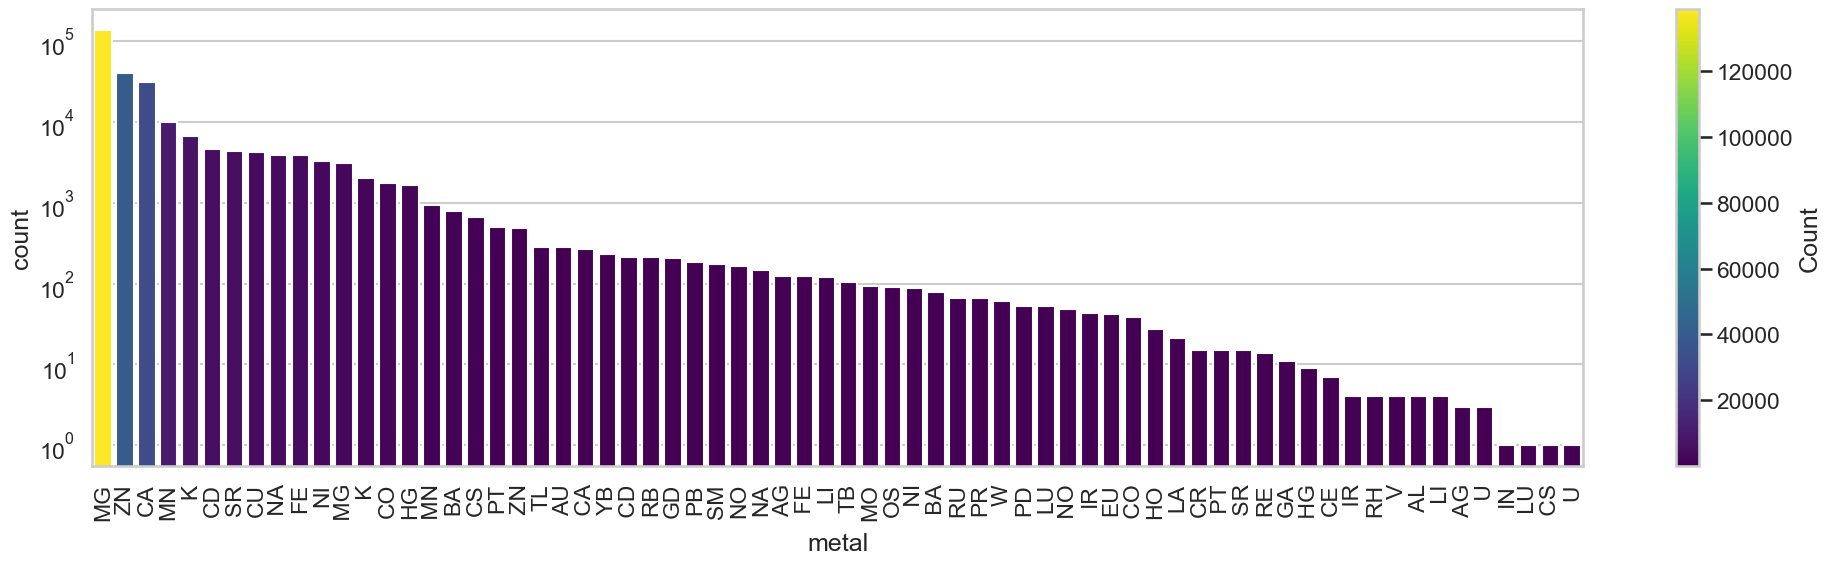

In [34]:
fig, ax = plt.subplots(figsize=(20, 6))

# Create the bar plot
sns.barplot(x='metal', y='count', data=counts_data, palette='viridis', ax=ax)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add color gradient based on count
bars = ax.patches
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=counts_data['count'].min(), vmax=counts_data['count'].max()))
for bar in bars:
    bar.set_facecolor(sm.to_rgba(bar.get_height()))

# Add colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Count')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67],
 [Text(0, 0, 'MG'),
  Text(1, 0, 'ZN'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'MN'),
  Text(4, 0, 'K'),
  Text(5, 0, 'CD'),
  Text(6, 0, 'SR'),
  Text(7, 0, 'CU'),
  Text(8, 0, ' NA'),
  Text(9, 0, 'FE'),
  Text(10, 0, 'NI'),
  Text(11, 0, ' MG'),
  Text(12, 0, ' K'),
  Text(13, 0, 'CO'),
  Text(14, 0, 'HG'),
  Text(15, 0, ' MN'),
  Text(16, 0, 'BA'),
  Text(17, 0, 'CS'),
  Text(18, 0, 'PT'),
  Text(19, 0, ' ZN'),
  Text(20, 0, 'TL'),
  Text(21, 0, 'AU'),
  Text(22, 0, ' CA'),
  Text(23, 0, 'YB'),
  Text(24, 0, ' CD'),
  Text(25, 0, 'RB'),
  Text(26, 0, 'GD'),
  Text(27, 0, 'PB'),
  Text(28, 0, 'SM'

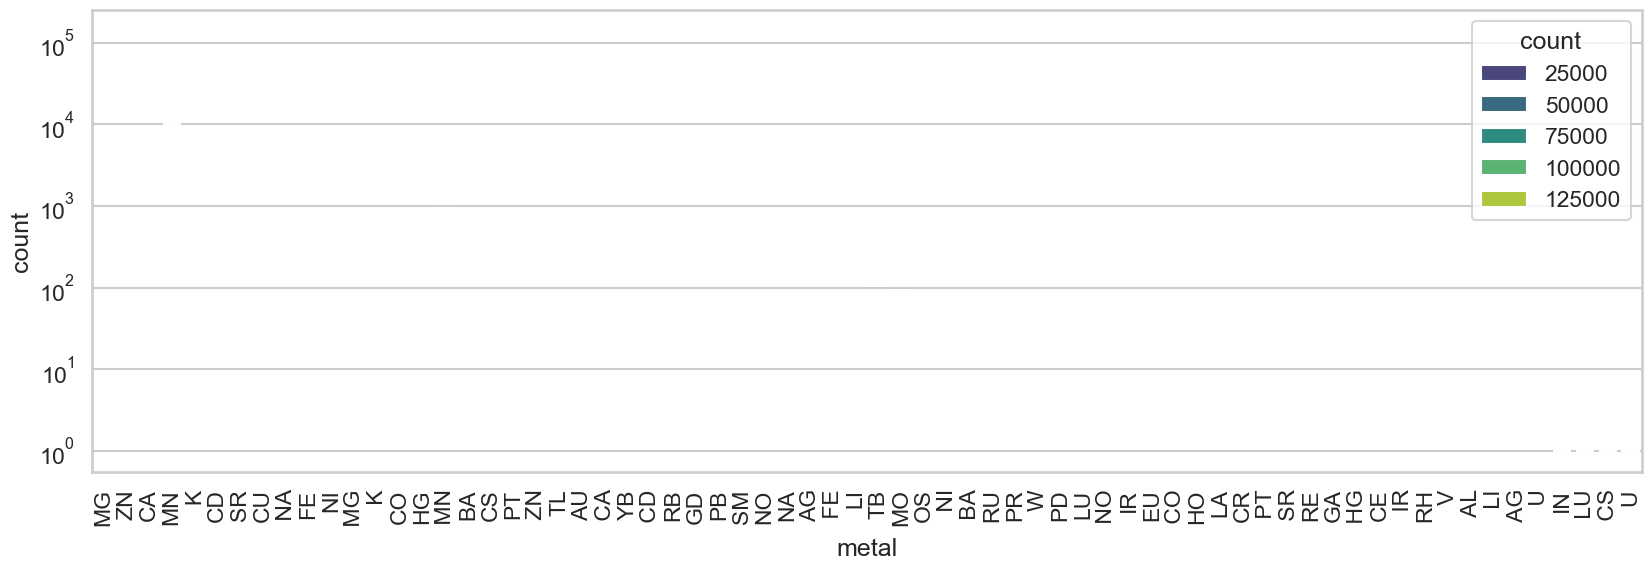

In [32]:
# sort by count 
counts_data = counts_data.sort_values('count', ascending=False)
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='metal', y='count', data=counts_data, hue='count', palette='viridis', log_scale=True, ax=ax)

# rotate x labels
plt.xticks(rotation=90)

## 2. Presence of heteroatoms

Text(0.5, 1.0, 'Contains non water hetero ligand')

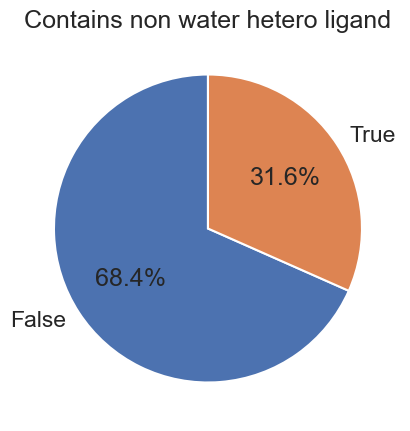

In [39]:
# make a pie plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(labels_df['hetlig'].value_counts(), labels=labels_df['hetlig'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax.set_title('Contains non water hetero ligand')

## 3. Broken residues

In [43]:
df = labels_df

In [65]:
df['incomplete_residues'].value_counts().index.to_list()

['GLU700',
 'LYS57',
 'LYS28',
 'LYS6',
 'LYS182',
 'LYS161',
 'GLU65',
 'GLN128',
 'ARG59',
 'LYS73',
 'LYS87',
 'LYS38',
 'GLN232, LYS310',
 'ARG274, LYS275',
 'LYS22',
 'LYS538',
 'LYS581',
 'GLU31',
 'ARG59, GLU60, GLN101, GLU136, LYS139',
 'LYS45',
 'LYS98',
 'LYS41',
 'LYS310',
 'GLU86',
 'GLU27',
 'LYS312',
 'GLN324',
 'LYS99',
 'LYS37',
 'LYS155',
 'GLY82',
 'LYS30',
 'LEU244',
 'ARG155',
 'TYR143',
 'LYS26',
 'LYS141, LYS143',
 'GLN68',
 'LYS658',
 'GLN324, LYS325',
 'LYS261',
 'LYS191',
 'LYS32',
 'SER525',
 'PHE253',
 'MET1',
 'LYS126',
 'VAL480',
 'GLU13',
 'LYS2',
 'LYS169',
 'LYS65',
 'LYS13',
 'LYS275',
 'GLU520',
 'LYS66',
 'ARG91',
 'LYS70',
 'LYS39',
 'GLU407',
 'ARG220',
 'ARG13',
 'VAL120',
 'GLU75',
 'LEU70',
 'ARG66',
 'LYS221',
 'VAL53, LYS60',
 'SER132',
 'LYS60',
 'LYS42',
 'LYS252',
 'GLU1173, LYS1174, LYS1176',
 'LYS128',
 'LYS6, LYS9',
 'LYS241',
 'LYS31',
 'ARG274',
 'LYS89',
 'LYS90',
 'SER97',
 'LYS21',
 'LYS29',
 'LYS88',
 'LYS181',
 'ARG131',
 'GLU55',


In [67]:
amino_acid_counts.value_counts()

incomplete_residues
{}                                                                        304209
{'LYS': 1}                                                                  2596
{'GLU': 1}                                                                  1182
{'ARG': 1}                                                                   982
{'GLN': 1}                                                                   440
                                                                           ...  
{'SER': 1, ' SE': 1, ' HI': 1}                                                 1
{'VAL': 1, ' GL': 1, ' AR': 1}                                                 1
{'VAL': 1, ' AR': 1, ' ME': 1}                                                 1
{'THR': 1, ' GL': 3, ' TH': 2, ' LY': 1, ' PH': 1, ' SE': 3, ' AL': 1}         1
{'SER': 1, ' PH': 1}                                                           1
Name: count, Length: 1164, dtype: int64

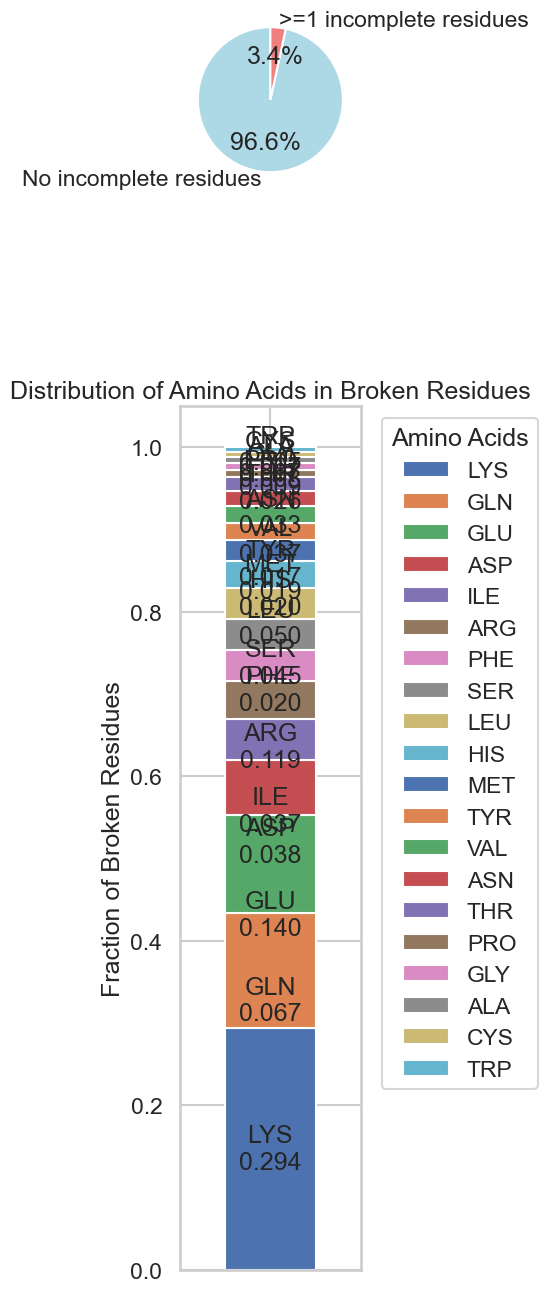

In [76]:
def count_amino_acids(residues):
    if pd.isna(residues):
        return Counter()
    return Counter(res.strip()[:3] for res in residues.split(','))

# Count amino acids for each row
amino_acid_counts = df['incomplete_residues'].apply(count_amino_acids)

# Calculate the number of examples with and without broken residues
with_broken = amino_acid_counts.apply(len).astype(bool).sum()
without_broken = len(df) - with_broken

# Sum up all counts and calculate fractions
total_counts = sum(amino_acid_counts, Counter())
total_broken_residues = sum(total_counts.values())
amino_acid_fractions = {k: v / total_broken_residues for k, v in total_counts.items()}

# Create the plot with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 15), gridspec_kw={'height_ratios': [1, 1.7]})
# give much more height to second plot

# Pie chart
ax1.pie([without_broken, with_broken], labels=['No incomplete residues', '>=1 incomplete residues'], 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
# Stacked bar chart
amino_acids = list(amino_acid_fractions.keys())
fractions = list(amino_acid_fractions.values())

# Create a DataFrame with a single row for all amino acids
ax2_df = pd.DataFrame([amino_acid_fractions]).sort_values(by=0, axis=1, ascending=False)

# Plot stacked bar
ax2_df.plot(kind='bar', stacked=True, ax=ax2, legend=False, width=0.5)

# Customize the stacked bar chart
ax2.set_xticklabels([''])  # Remove x-axis label
ax2.set_ylabel('Fraction of Broken Residues')
ax2.set_title('Distribution of Amino Acids in Broken Residues')

# Add a legend
ax2.legend(amino_acids, title='Amino Acids', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels to the stacked bars
bottom = 0
for i, (amino_acid, fraction) in enumerate(amino_acid_fractions.items()):
    ax2.text(0, bottom + fraction / 2, f'{amino_acid}\n{fraction:.3f}', 
             ha='center', va='center')
    bottom += fraction

plt.tight_layout()
plt.show()

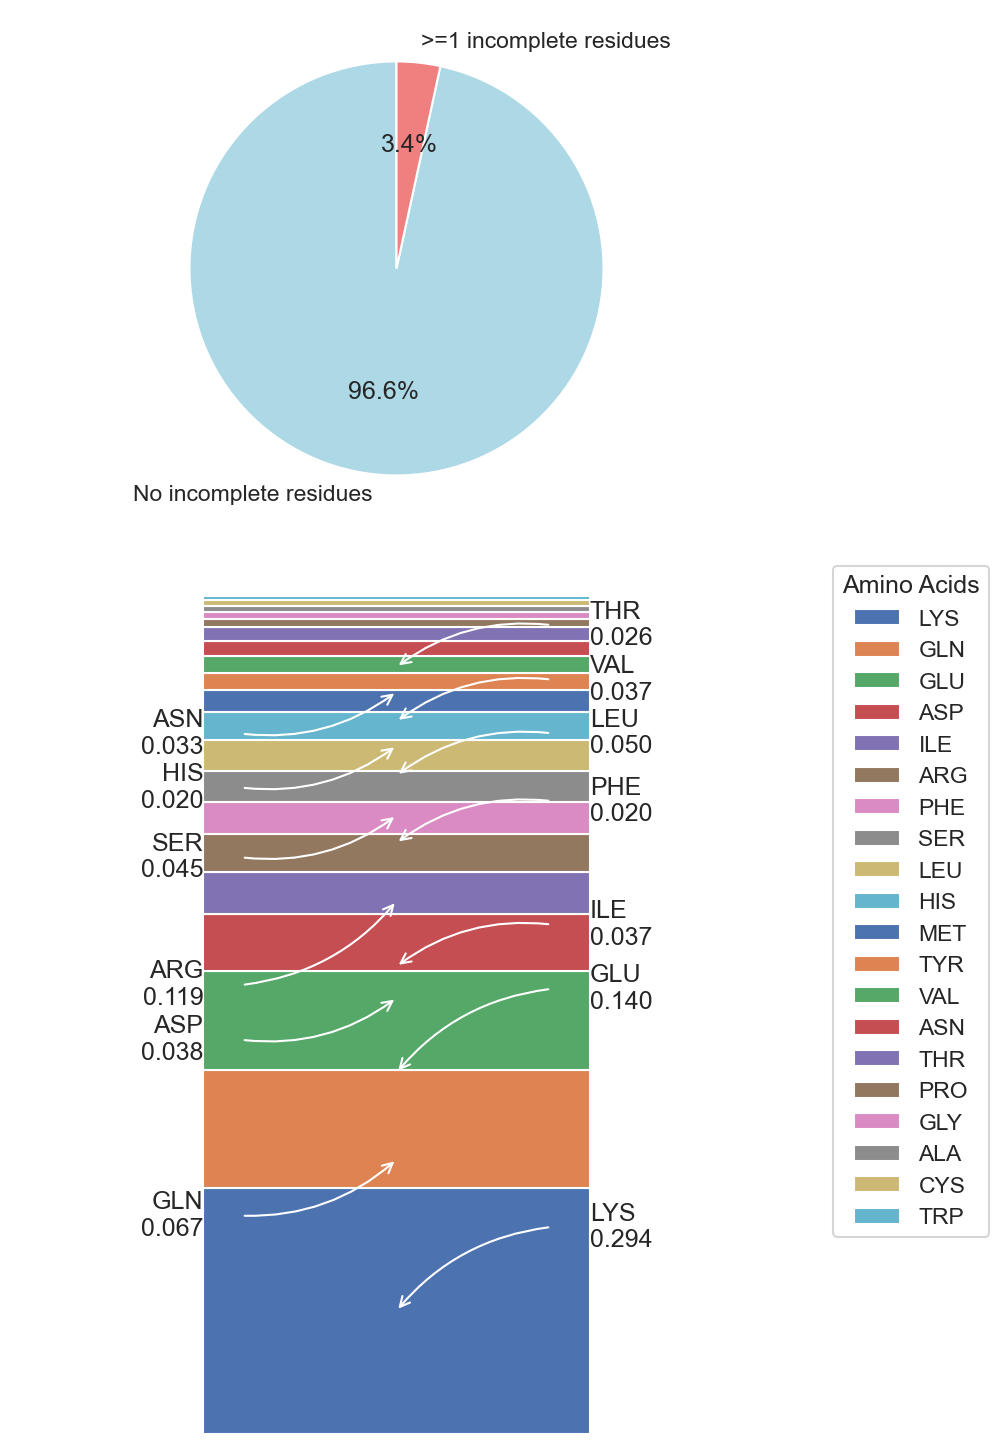

In [81]:
def count_amino_acids(residues):
    if pd.isna(residues):
        return Counter()
    return Counter(res.strip()[:3] for res in residues.split(','))

# Count amino acids for each row
amino_acid_counts = df['incomplete_residues'].apply(count_amino_acids)

# Calculate the number of examples with and without broken residues
with_broken = amino_acid_counts.apply(len).astype(bool).sum()
without_broken = len(df) - with_broken

# Sum up all counts and calculate fractions
total_counts = sum(amino_acid_counts, Counter())
total_broken_residues = sum(total_counts.values())
amino_acid_fractions = {k: v / total_broken_residues for k, v in total_counts.items()}

# Create the plot with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15), gridspec_kw={'height_ratios': [1, 1.7]})

# Pie chart
ax1.pie([without_broken, with_broken], labels=['No incomplete residues', '>=1 incomplete residues'], 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Stacked bar chart
amino_acids = list(amino_acid_fractions.keys())
fractions = list(amino_acid_fractions.values())

# Create a DataFrame with a single row for all amino acids
ax2_df = pd.DataFrame([amino_acid_fractions]).sort_values(by=0, axis=1, ascending=False)

# Plot stacked bar
ax2_df.plot(kind='bar', stacked=True, ax=ax2, legend=False, width=0.5)

# Customize the stacked bar chart
ax2.set_xticklabels([''])  # Remove x-axis label

# Add a legend
ax2.legend(amino_acids, title='Amino Acids', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add offset labels with arrows
bottom = 0
for i, (amino_acid, fraction) in enumerate(amino_acid_fractions.items()):
    if fraction < 0.019:
        continue
    middle = bottom + fraction / 2
    
    # Alternate sides for labels
    side = 1 if i % 2 == 0 else -1
    
    # Calculate offset based on fraction size
    offset = max(0.05, min(fraction, 0.1))  # Adjust these values as needed
    
    # Draw arrow
    ax2.annotate('', xy=(0, middle), xytext=(side * 0.2, middle + side * offset),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
    
    # Add text
    ax2.text(side * 0.25, middle + side * offset, f'{amino_acid}\n{fraction:.3f}', 
             ha='left' if side > 0 else 'right', va='center')
    
    bottom += fraction

# remove all spines and axis for ax2
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

# Adjust the plot layout
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Make room for the legend

plt.show()